In [1]:
from keras.datasets import imdb
from keras import layers, models
from keras.preprocessing import sequence

In [2]:
max_words = 10000
(train_texts, train_labels), (test_texts, test_labels) = imdb.load_data(num_words=max_words)

In [3]:
print(train_texts.shape)

(25000,)


In [4]:
maxlen = 500

train_texts = [x[::-1] for x in train_texts]
test_texts = [x[::-1] for x in  test_texts]

train_texts = sequence.pad_sequences(train_texts, maxlen=maxlen)
test_texts = sequence.pad_sequences(test_texts, maxlen=maxlen)

In [5]:
print(train_texts.shape)

(25000, 500)


In [6]:
model = models.Sequential()
model.add(layers.Embedding(max_words, 128, input_length=maxlen))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                20608     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,300,641
Trainable params: 1,300,641
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [9]:
history = model.fit(train_texts, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 94s 586ms/step - loss: 0.5826 - acc: 0.6854 - val_loss: 0.3591 - val_acc: 0.8550
Epoch 2/10
157/157 [==============================] - 106s 678ms/step - loss: 0.3163 - acc: 0.8794 - val_loss: 0.5350 - val_acc: 0.7998
Epoch 3/10
157/157 [==============================] - 107s 684ms/step - loss: 0.2631 - acc: 0.9042 - val_loss: 0.3693 - val_acc: 0.8594
Epoch 4/10
157/157 [==============================] - 108s 686ms/step - loss: 0.2113 - acc: 0.9263 - val_loss: 0.3765 - val_acc: 0.8382
Epoch 5/10
157/157 [==============================] - 118s 753ms/step - loss: 0.1848 - acc: 0.9363 - val_loss: 0.4900 - val_acc: 0.8342
Epoch 6/10
157/157 [==============================] - 109s 697ms/step - loss: 0.1689 - acc: 0.9420 - val_loss: 0.4720 - val_acc: 0.8360
Epoch 7/10
157/157 [==============================] - 117s 748ms/step - loss: 0.1494 - acc: 0.9479 - val_loss: 0.8323 - val_acc: 0.7908
Epoch 8/10
157/157 [=============================

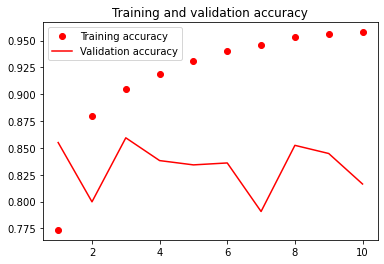

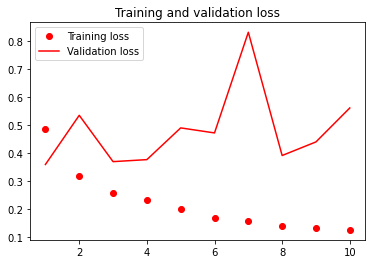

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()
plt.title('Training and validation loss')

plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Embedding(max_words, 128, input_length=maxlen))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_texts, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 218s 1s/step - loss: 0.5991 - acc: 0.6596 - val_loss: 0.3904 - val_acc: 0.8454
Epoch 2/10
157/157 [==============================] - 220s 1s/step - loss: 0.3254 - acc: 0.8754 - val_loss: 0.3454 - val_acc: 0.8592
Epoch 3/10
157/157 [==============================] - 218s 1s/step - loss: 0.2523 - acc: 0.9097 - val_loss: 0.4243 - val_acc: 0.8386
Epoch 4/10
157/157 [==============================] - 185s 1s/step - loss: 0.2149 - acc: 0.9254 - val_loss: 0.4254 - val_acc: 0.8380
Epoch 5/10
157/157 [==============================] - 211s 1s/step - loss: 0.1867 - acc: 0.9326 - val_loss: 0.5377 - val_acc: 0.8144
Epoch 6/10
157/157 [==============================] - 188s 1s/step - loss: 0.1696 - acc: 0.9374 - val_loss: 0.5316 - val_acc: 0.8204
Epoch 7/10
157/157 [==============================] - 187s 1s/step - loss: 0.1460 - acc: 0.9503 - val_loss: 0.4391 - val_acc: 0.8480
Epoch 8/10
157/157 [==============================] - 188s 1s/step - 

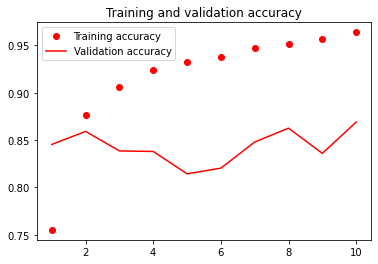

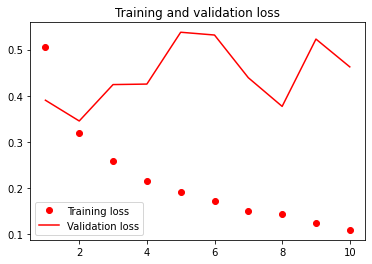

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()
plt.title('Training and validation loss')

plt.show()